<a href="https://colab.research.google.com/github/Rochakr4/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [81]:
#importing essential datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pylab import rcParams
import datetime as dt
#importing Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c9e2a4d2c39d32bfb792a4dded6724fe077b16bd284fc93671f4903c0b672ae4
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading file
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 4-Online Retail Customer Segmentation /Online Retail.csv')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Prepping

##NaN value handling

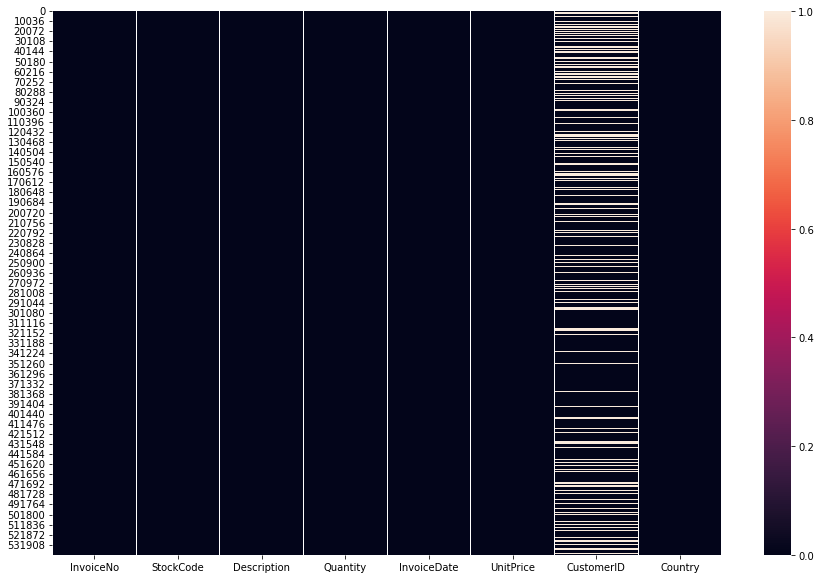

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

A lot of Nan values are found in the 'CustomerID' feature, which in turn is a unique identifier. So, implementing imputation techniques doesn’t make sense.

In [9]:
df.dropna(inplace=True)# dropping Nan value rows

For further better analysis iam creating date-related features such as ‘month’, ‘day’, ‘year’ etc.

In [10]:
#Removing the time from invoice date, since it's not in proper format. This will enable us to convert string type to datetime object
df.loc[: , 'InvoiceDate']=df.loc[: , 'InvoiceDate'].apply(lambda x: x[:][:-5])
#convering to datetime object
df.loc[ : , 'InvoiceDate']=pd.to_datetime(df.loc [ : ,'InvoiceDate'])
#creating month year and day features
df.loc[:,'Month']=df.loc[:,'InvoiceDate'].dt.month
df.loc[:,'Day']=df.loc[:,'InvoiceDate'].dt.day
df['Day_Name']=df['InvoiceDate'].dt.day_name()
df.loc[:,'Year']=df.loc[:,'InvoiceDate'].dt.year

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,12,Tuesday,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,12,Tuesday,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,Tuesday,2010


# EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

## InvoiceNo

As given in data discription ,Invoice number is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

In [12]:
df[df['InvoiceNo'].str.contains('C')]#Checking for cancelled invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year
141,C536379,D,Discount,-1,2010-01-12,27.50,14527.0,United Kingdom,1,12,Tuesday,2010
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12,4.65,15311.0,United Kingdom,1,12,Tuesday,2010
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12,1.65,17548.0,United Kingdom,1,12,Tuesday,2010
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom,1,12,Tuesday,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12,0.83,14397.0,United Kingdom,9,12,Monday,2011
541541,C581499,M,Manual,-1,2011-09-12,224.69,15498.0,United Kingdom,9,12,Monday,2011
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12,10.95,15311.0,United Kingdom,9,12,Monday,2011
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12,1.25,17315.0,United Kingdom,9,12,Monday,2011


There are 8,905 cancellation entries in the dataset.

For better analysis I am dropping all the canceled invoice rows because there are chances that it may act as noise or bias.

Here I am not going to remove all the transactions related to the cancellation because there was an urge or intention of purchasing.

In [13]:
df=df[~df['InvoiceNo'].str.contains('C')]#Dropping the canceled row entries

## Description

In [14]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)#Checking for items and the corresponding quantities sold.

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
BLACK VINT ART DEC CRYSTAL BRACELET        1
FLOWER SHOP DESIGN MUG                     1
SET 36 COLOURING PENCILS DOILEY            1
HEN HOUSE W CHICK IN NEST                  1
AMBER BERTIE GLASS BEAD BAG CHARM          1
Name: Quantity, Length: 3877, dtype: int64

There are 3877 items sold from 01/12/2010 to 09/12/2011.

## UnitPrice

In [15]:
pd.concat([df.groupby('Description')['Quantity'].sum(), df.groupby('Description')['UnitPrice'].max()], axis=1).sort_values(by='UnitPrice',ascending=False)

,Quantity,UnitPrice
Description,,
POSTAGE,3120,8142.750
Manual,7179,4161.060
DOTCOM POSTAGE,16,1599.260
PICNIC BASKET WICKER 60 PIECES,61,649.500
VINTAGE BLUE KITCHEN CABINET,26,295.000
...,...,...
POPART WOODEN PENCILS ASST,8900,0.120
FOLDING CAMPING SCISSOR W/KNIF & S,30,0.120
PORCELAIN BUDAH INCENSE HOLDER,1501,0.100


The unit price is ranging from 0.001 to 8142.75.
Unit price of 75% of items sold is less than 4.

## Total sales

For better understanding and analysis am introducing a new feature i.e., 'Total sales' which is the arrived by multiplying quantity and unit price

In [16]:
df['Total_Sales']=df['Quantity']*df['UnitPrice']#Introducing Total sales feature

In [17]:
df.sort_values(by='Total_Sales',ascending=False).reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_Name,Year,Total_Sales
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12,2.08,16446.0,United Kingdom,9,12,Monday,2011,168469.60
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,1,18,Tuesday,2011,77183.60
2,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06,649.50,15098.0,United Kingdom,10,6,Thursday,2011,38970.00
3,173382,551697,POST,POSTAGE,1,2011-03-05,8142.75,16029.0,United Kingdom,3,5,Saturday,2011,8142.75
4,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20,5.06,17450.0,United Kingdom,9,20,Tuesday,2011,7144.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2011-07-26,0.00,16818.0,United Kingdom,7,26,Tuesday,2011,0.00
397920,285657,561916,M,Manual,1,2011-01-08,0.00,15581.0,United Kingdom,1,8,Saturday,2011,0.00
397921,395529,571035,M,Manual,1,2011-10-13,0.00,12446.0,RSA,10,13,Thursday,2011,0.00
397922,439361,574469,22385,JUMBO BAG SPACEBOY DESIGN,12,2011-04-11,0.00,12431.0,Australia,4,11,Monday,2011,0.00


Lets check how many items constitute percentage proportion of total sales happened over the year.

In [18]:
def check(val):
   for i in range(1,3877):
       tmp=df.groupby('Description')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       if tmp>val:
          print(f'Top {i} items i.e., {round(i*100/3877,2)}% of total items for sale constitute {round(tmp*100,2)}% of total sales')
          break

In [19]:
check(0.25)
check(0.5)
check(0.75)
check(0.9)

Top 61 items i.e., 1.57% of total items for sale constitute 25.12% of total sales
Top 237 items i.e., 6.11% of total items for sale constitute 50.04% of total sales
Top 658 items i.e., 16.97% of total items for sale constitute 75.02% of total sales
Top 1306 items i.e., 33.69% of total items for sale constitute 90.0% of total sales


## Customer ID

In [20]:
def check(val):
   for i in range(1,4339):
       tmp=df.groupby('CustomerID')['Total_Sales'].sum().sort_values(ascending=False).head(i).reset_index()['Total_Sales'].sum()/df['Total_Sales'].sum()
       if tmp>val:
          print(f'Top {i} customers i.e., {round(i*100/4339,2)}% of total customers constitute {round(tmp*100,2)}% of total sales')
          break

In [21]:
check(0.25)
check(0.5)
check(0.75)
check(0.9)

Top 23 customers i.e., 0.53% of total customers constitute 25.29% of total sales
Top 212 customers i.e., 4.89% of total customers constitute 50.05% of total sales
Top 885 customers i.e., 20.4% of total customers constitute 75.01% of total sales
Top 1908 customers i.e., 43.97% of total customers constitute 90.0% of total sales


## Country

In [22]:
temp_df=pd.concat([df.groupby('Country')['CustomerID'].count(), df.groupby('Country')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'})
temp_df['Total sales to customer ratio']=temp_df['Total_Sales']/temp_df['No. of customers']

In [23]:
temp_df.sort_values(by='Total sales to customer ratio',ascending=False).reset_index()

,Country,No. of customers,Total_Sales,Total sales to customer ratio
0,Netherlands,2363,285446.340,120.798282
1,Australia,1185,138521.310,116.895620
2,Japan,321,37416.370,116.561900
3,Singapore,222,21279.290,95.852658
4,Sweden,451,38378.330,85.096075
5,Denmark,380,18955.340,49.882474
6,Lithuania,35,1661.060,47.458857
7,Lebanon,45,1693.880,37.641778
8,EIRE,7238,265545.900,36.687745
9,Brazil,32,1143.600,35.737500


In [24]:
#Creating bar graph from above dataframe
px.bar(data_frame=temp_df.sort_values(by='Total sales to customer ratio',ascending=False).reset_index(),
                  width=1000,height=800,
                  x='Total sales to customer ratio',y='Country',
                  hover_data=['No. of customers'],color='Total_Sales',
                  color_continuous_scale=px.colors.sequential.Hot_r,
                  title='Countries w.r.t total sales and sales to no. of customer ratio')

## Month

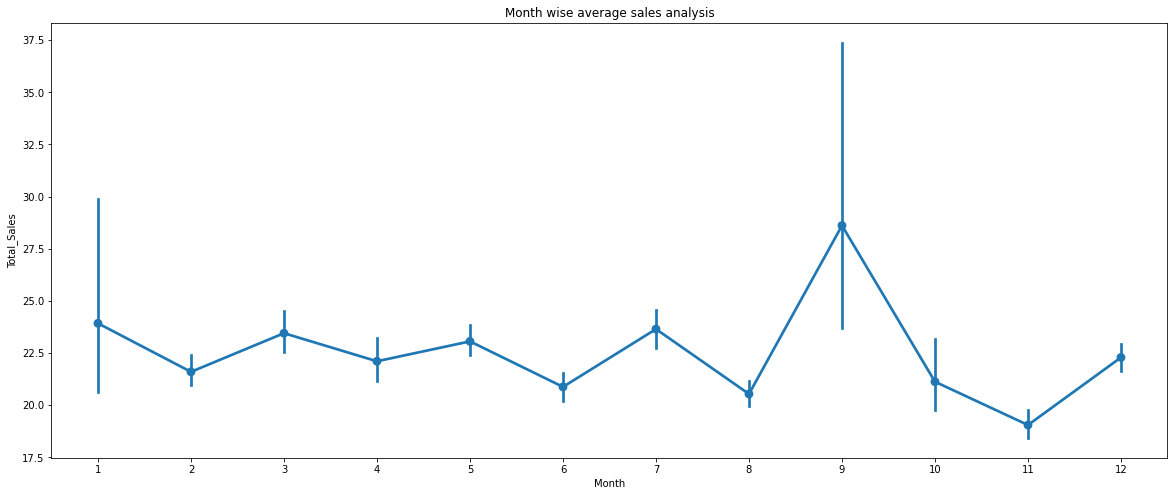

In [25]:
#Month wise average sales analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Month',y='Total_Sales')
ax.set(title='Month wise average sales analysis')
#Month wise total sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Month')['CustomerID'].count(), df.groupby('Month')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reset_index(),
                y=['Total_Sales','No. of customers'],x='Month',title='Month wise total sales and no. of customer visit')
temp_bar.show()

## Day name

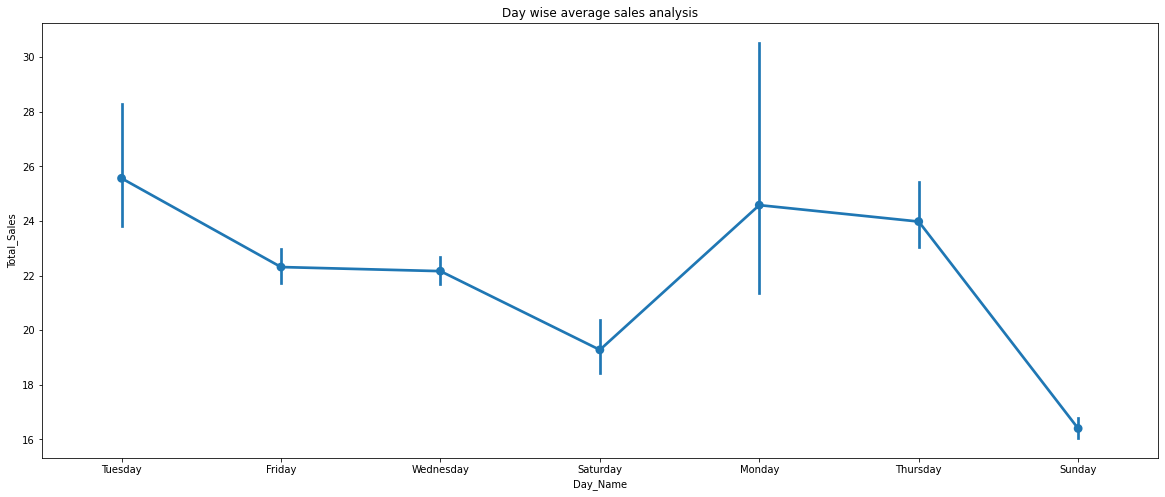

In [26]:
#Day wise average sales analysis
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Day_Name',y='Total_Sales')
ax.set(title='Day wise average sales analysis')
#Day wise total sales
temp_bar=px.bar(data_frame=pd.concat([df.groupby('Day_Name')['CustomerID'].count(),
                                      df.groupby('Day_Name')['Total_Sales'].sum()], axis=1).rename(columns = {'CustomerID':'No. of customers'}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(),
                y=['Total_Sales','No. of customers'],
                x='Day_Name',
                title='Day wise total sales and no. of customer visit')
temp_bar.show()

# RFM Analysis

In [27]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                       'InvoiceNo': lambda x: len(x), 
                                       'Total_Sales': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Sales': 'Monetary'}, inplace=True)

rfm_df.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,160,10,180.60
4335,18281.0,4,7,80.82
4336,18282.0,216,12,178.05
4337,18283.0,10,756,2094.88


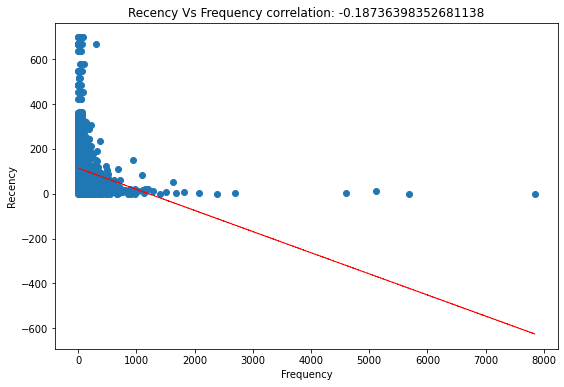

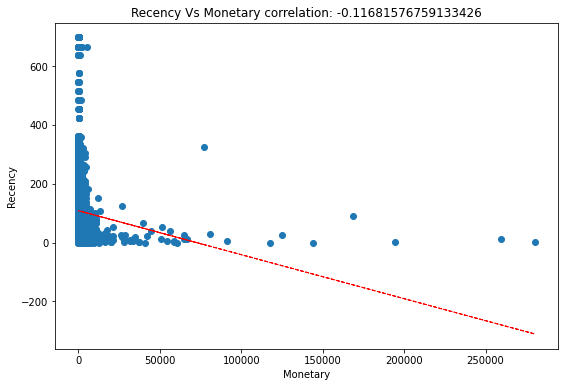

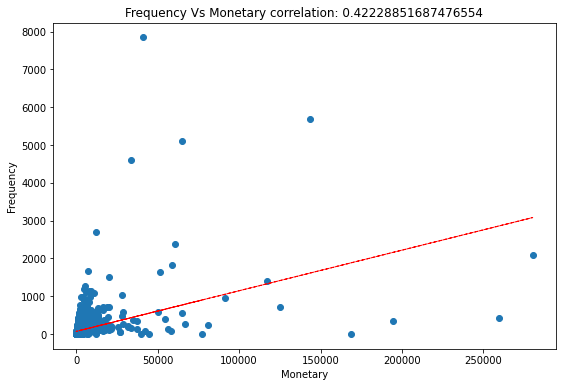

In [28]:
temp_list=['Recency','Frequency','Monetary']
i=0
for tmp in ['Recency','Frequency','Monetary']:
   i=i+1
   for col in temp_list[i:3]:
       fig=plt.figure(figsize=(9,6))
       ax=fig.gca()
       feature=rfm_df[col]
       label=rfm_df[tmp]
       correlation=feature.corr(label)
       plt.scatter(x=feature,y=label)
       plt.xlabel(col)
       plt.ylabel(tmp)
       ax.set_title(tmp+' Vs '+col + ' correlation: ' + str(correlation) )
       z=np.polyfit(feature,label,1)
       y_hat=np.poly1d(z)(rfm_df[col])
       plt.plot(rfm_df[col],y_hat,"r--",lw=1)
       plt.show()

<Figure size 648x432 with 0 Axes>

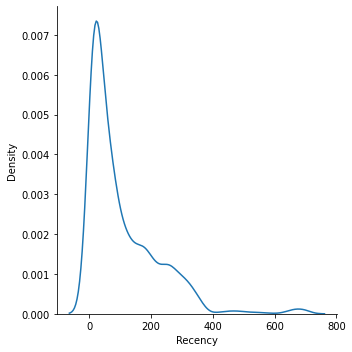

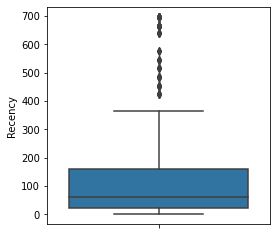

<Figure size 648x432 with 0 Axes>

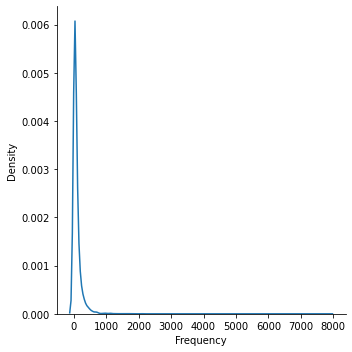

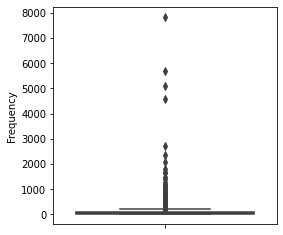

<Figure size 648x432 with 0 Axes>

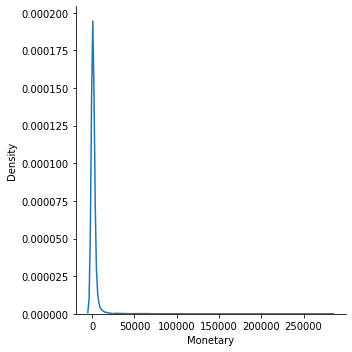

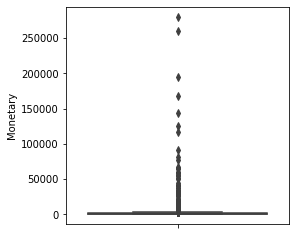

In [29]:
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=(rfm_df[x]), kind="kde")
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=(rfm_df[x]))
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

In [30]:
#Segmenting R, F and M in buckets of 4 and assigning scores.
rfm_df['R'] =  pd.qcut(rfm_df['Recency'], 4, [4,3,2,1])
rfm_df['F'] =  pd.qcut(rfm_df['Frequency'], 4, [1,2,3,4])
rfm_df['M'] =  pd.qcut(rfm_df['Monetary'], 4, [1,2,3,4])
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,40,182,4310.00,3,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,4,3,4
12350.0,311,17,334.40,1,1,2


In [31]:
#creating classes
rfm_df['RFM_Class']= rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df['RFM_Score']= rfm_df['R'].astype(int) + rfm_df['F'].astype(int) + rfm_df['M'].astype(int)
rfm_df

,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,40,182,4310.00,3,4,4,344,11
12348.0,76,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,4,3,4,434,11
12350.0,311,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,160,10,180.60,2,1,1,211,4
18281.0,4,7,80.82,4,1,1,411,6
18282.0,216,12,178.05,1,1,1,111,3


In [32]:
#Classifying on basis of RFM_score to Grade 1,2,3 and 4
Customer_grade = ['B', 'B+', 'A', 'A+']
Score_cuts = pd.qcut(rfm_df.RFM_Score, q = 4, labels = Customer_grade)#
rfm_df['Customer_grade'] = Score_cuts.values
rfm_df=rfm_df.reset_index()
rfm_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade
0,12346.0,326,1,77183.60,1,1,4,114,6,B+
1,12347.0,40,182,4310.00,3,4,4,344,11,A+
2,12348.0,76,31,1797.24,2,2,4,224,8,A
3,12349.0,19,73,1757.55,4,3,4,434,11,A+
4,12350.0,311,17,334.40,1,1,2,112,4,B
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,160,10,180.60,2,1,1,211,4,B
4335,18281.0,4,7,80.82,4,1,1,411,6,B+
4336,18282.0,216,12,178.05,1,1,1,111,3,B
4337,18283.0,10,756,2094.88,4,4,4,444,12,A+


In [33]:
temp_df=rfm_df.groupby(['Customer_grade','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Customer_grade','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Customer_grade & RFM_Class in terms of number of customers')
treemap_country_wise.show()

target_type_piechart=px.pie(rfm_df.groupby('Customer_grade')['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'}), 
          values='No. of customers',
          names='Customer_grade',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

# K-Means clustering

In [114]:
rfm_df_1=rfm_df.copy()

<Figure size 648x432 with 0 Axes>

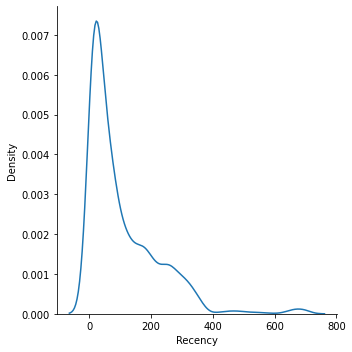

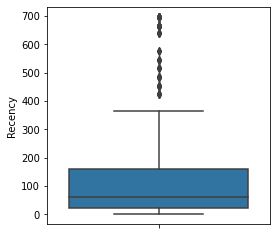

<Figure size 648x432 with 0 Axes>

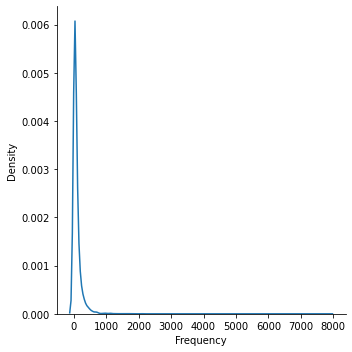

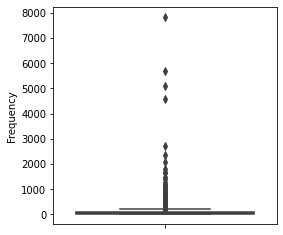

<Figure size 648x432 with 0 Axes>

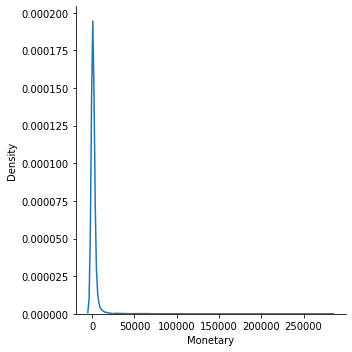

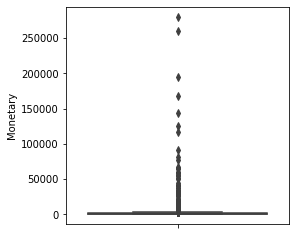

In [115]:
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=(rfm_df_1[x]), kind="kde")
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=(rfm_df_1[x]))
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

In [116]:
rfm_df_1[(rfm_df_1['Recency']<=0) | (rfm_df_1['Frequency']<=0) | (rfm_df_1['Monetary']<=0)]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade
30,12381.0,0,87,1845.31,4,3,4,434,11,A+
79,12444.0,0,177,5005.46,4,4,4,444,12,A+
137,12518.0,0,124,2056.89,4,4,4,444,12,A+
165,12553.0,0,191,3692.28,4,4,4,444,12,A+
177,12569.0,0,188,4124.69,4,4,4,444,12,A+
...,...,...,...,...,...,...,...,...,...,...
4083,17934.0,0,21,704.25,4,2,3,423,9,A
4252,18171.0,0,54,1231.31,4,3,3,433,10,A
4298,18229.0,0,164,7276.90,4,4,4,444,12,A+
4332,18277.0,0,8,110.38,4,1,1,411,6,B+


In [117]:
rfm_df_1['Recency']=rfm_df_1['Recency'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Monetary']=rfm_df_1['Monetary'].apply(lambda x:1 if x<=0 else x)
rfm_df_1['Frequency']=rfm_df_1['Frequency'].apply(lambda x:1 if x<=0 else x)

<Figure size 648x432 with 0 Axes>

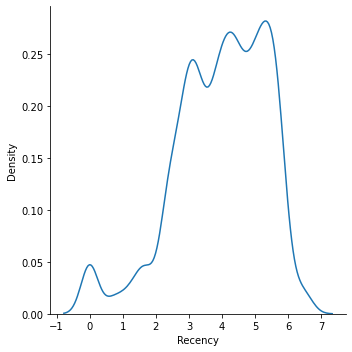

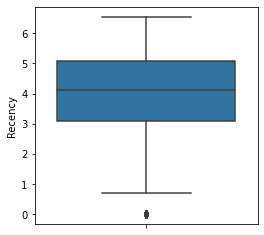

<Figure size 648x432 with 0 Axes>

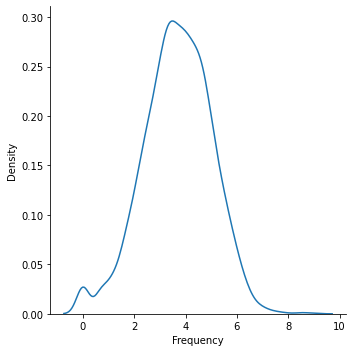

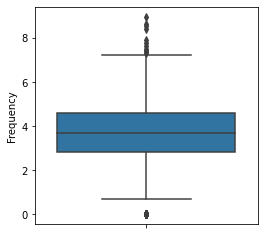

<Figure size 648x432 with 0 Axes>

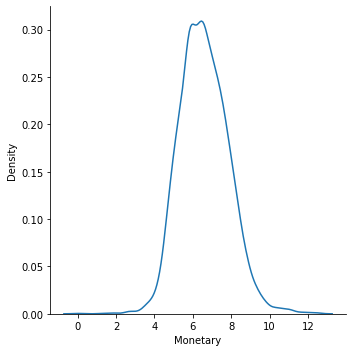

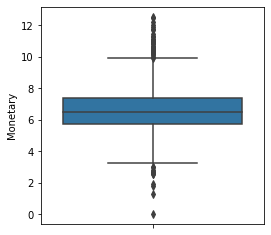

In [118]:
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=np.log(rfm_df_1[x]), kind="kde")
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=np.log(rfm_df_1[x]))
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

In [119]:
rfm_df_1=rfm_df_1[rfm_df_1.Monetary<100000]

<Figure size 648x432 with 0 Axes>

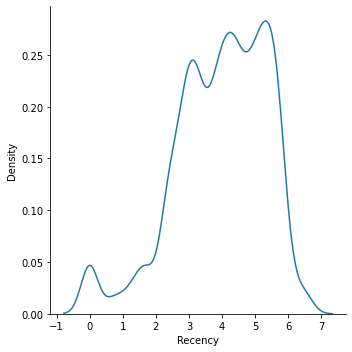

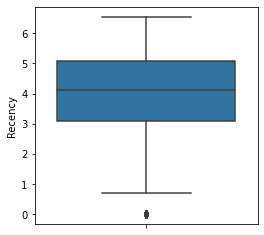

<Figure size 648x432 with 0 Axes>

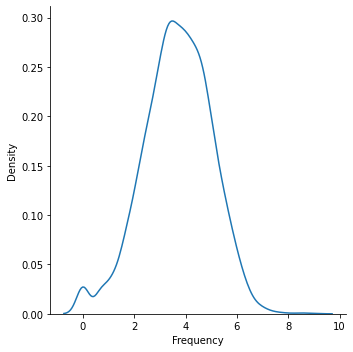

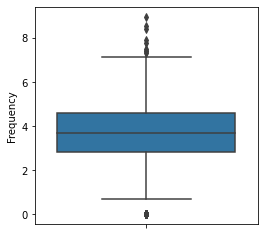

<Figure size 648x432 with 0 Axes>

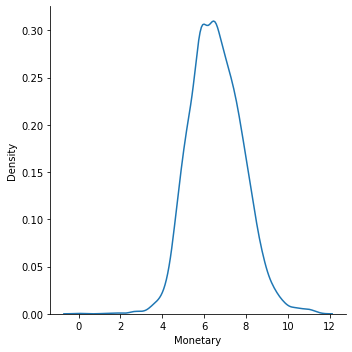

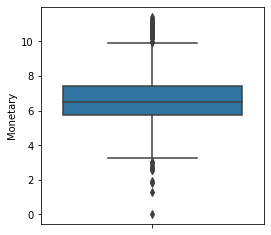

In [120]:
for x in ['Recency','Frequency','Monetary']:
    fig = plt.figure(figsize=(9, 6))
    sns.displot(data=np.log(rfm_df_1[x]), kind="kde")
    plt.show()
    plt.figure(figsize=(4,4))
    fig=sns.boxplot(y=np.log(rfm_df_1[x]))
    fig.set_title('')
    fig.set_ylabel(x)
    plt.show()

In [121]:
rfm_df_1['Recency_log']=np.log(rfm_df_1['Recency'])
rfm_df_1['Monetary_log']=np.log(rfm_df_1['Monetary'])
rfm_df_1['Frequency_log']=np.log(rfm_df_1['Frequency'])

In [122]:
x=rfm_df_1[['Recency_log','Frequency_log','Monetary_log']]

In [123]:
#Scaling data using StandardScaler() since all the features are having measure scale
scaler = StandardScaler()
#Implementing StandardScaler() on train and test data
X = scaler.fit_transform(x)

In [124]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
px.line(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),labels={'x': 'Number of Clusters(k)','y':'Sum of Square Distances'},title='Elbow Method For Optimal k')

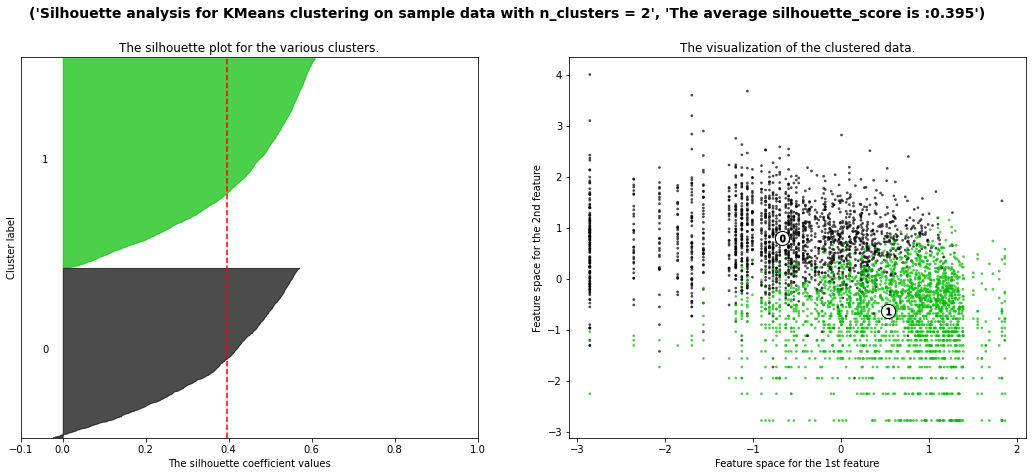

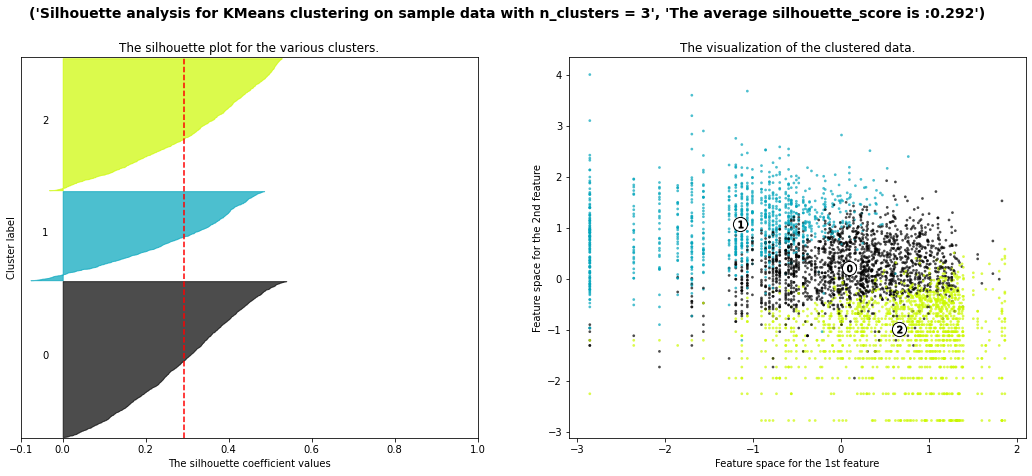

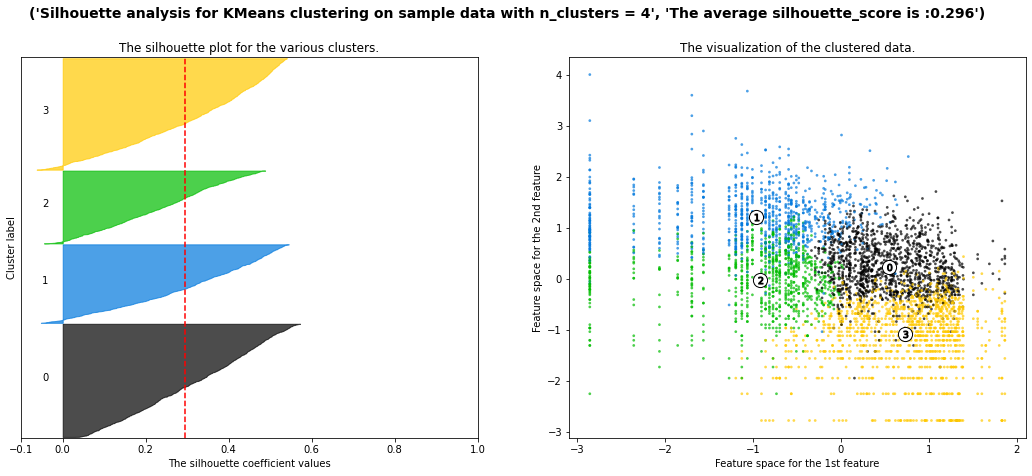

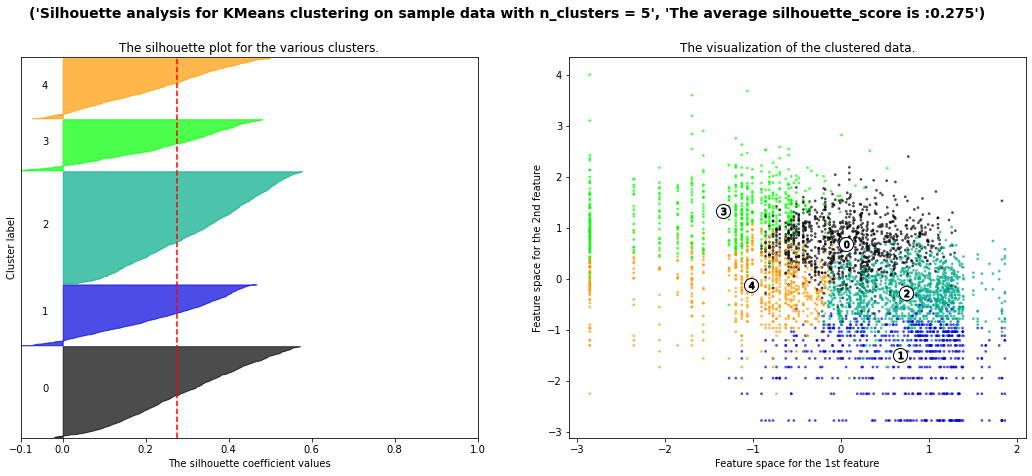

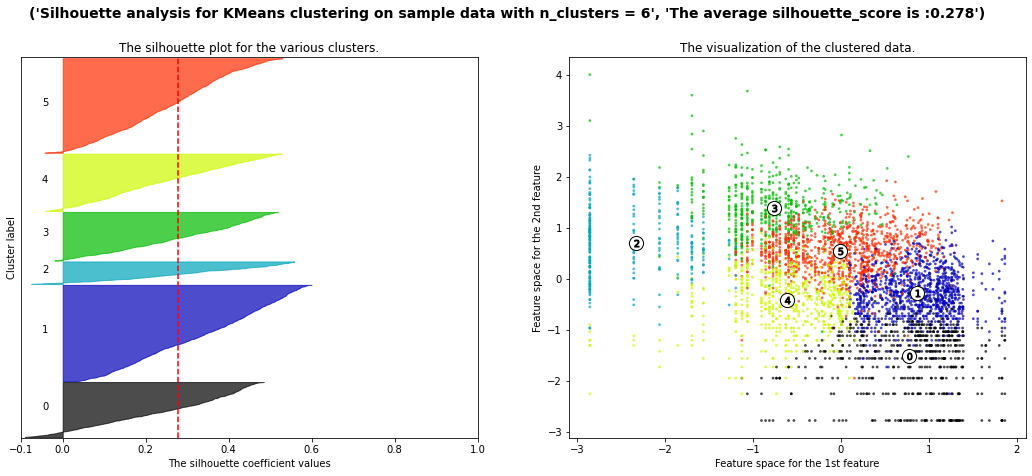

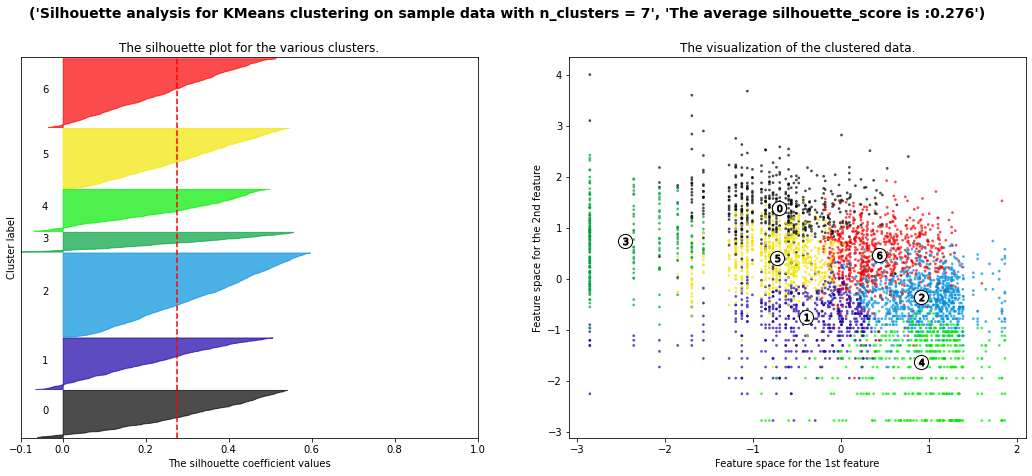

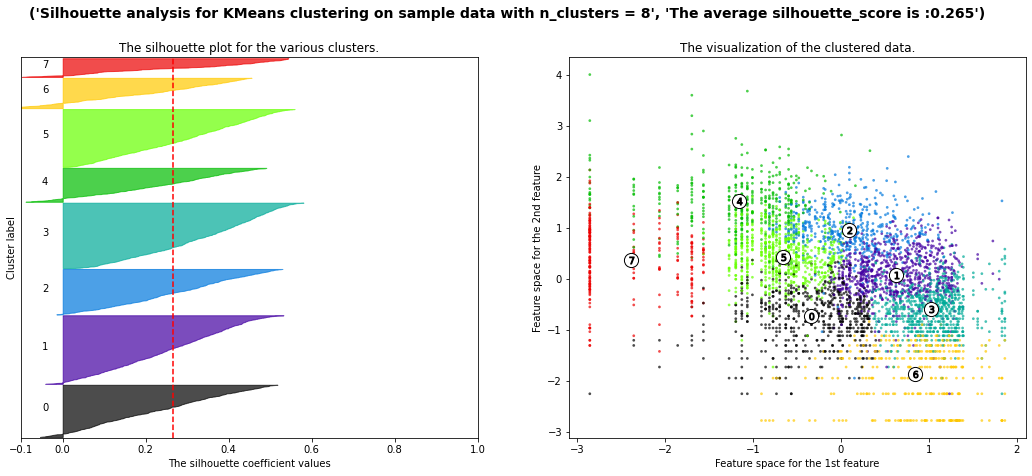

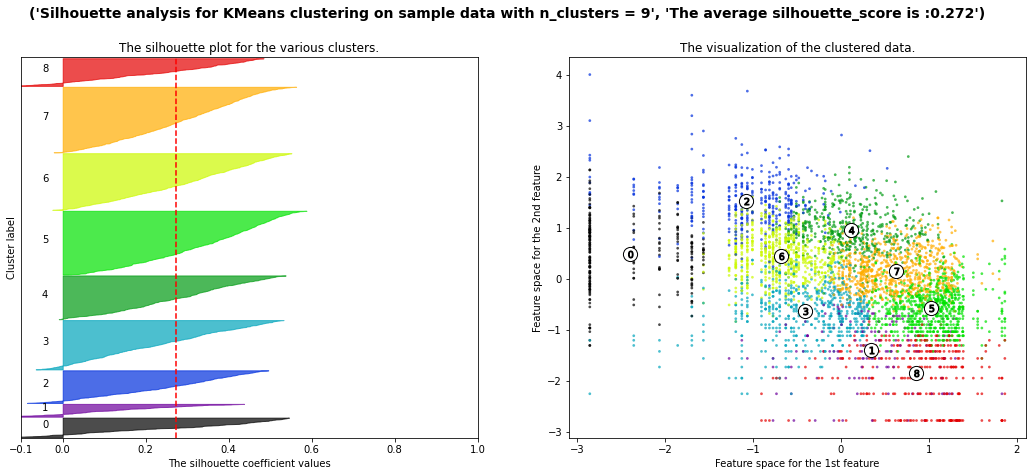

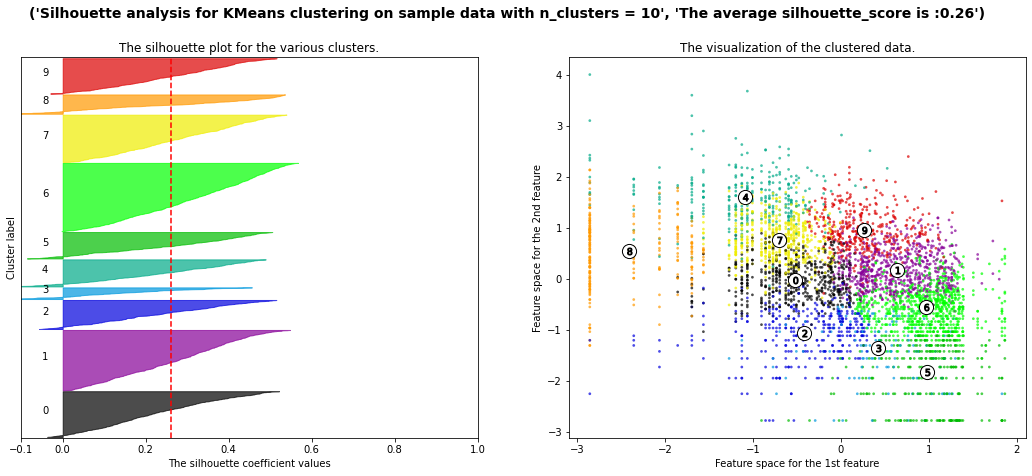

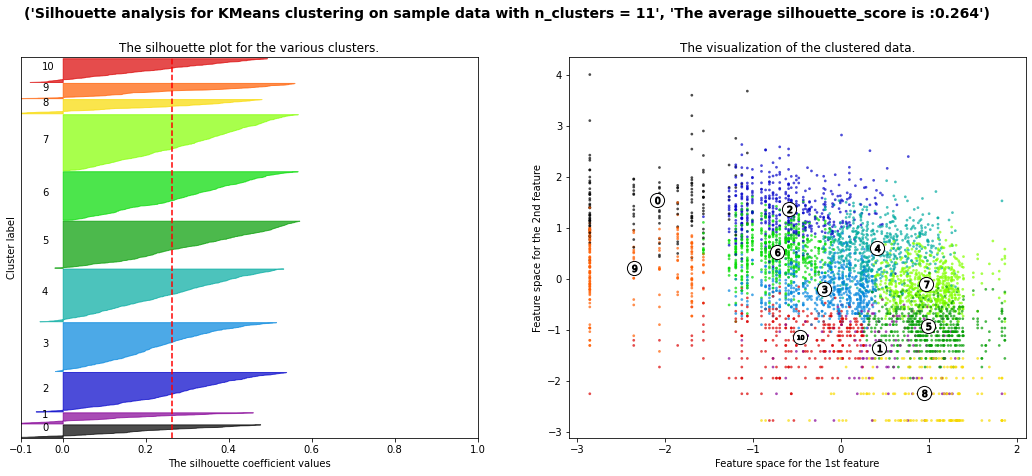

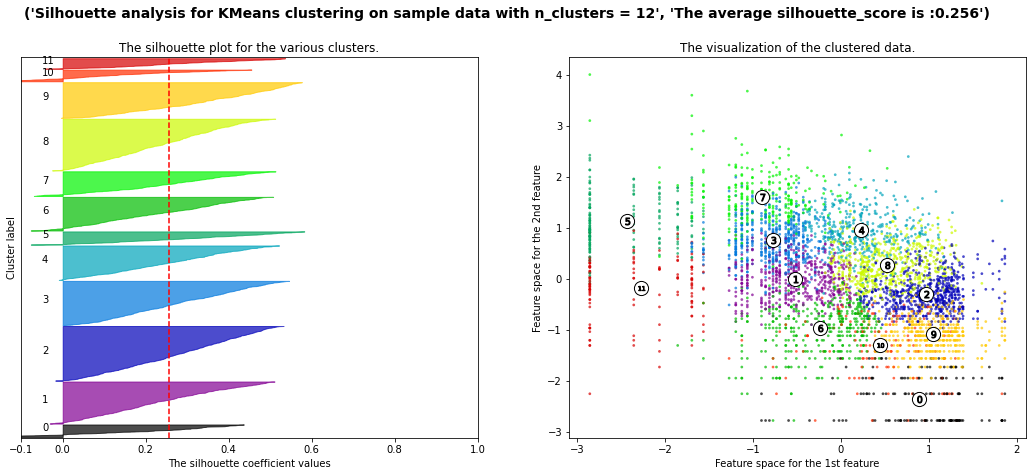

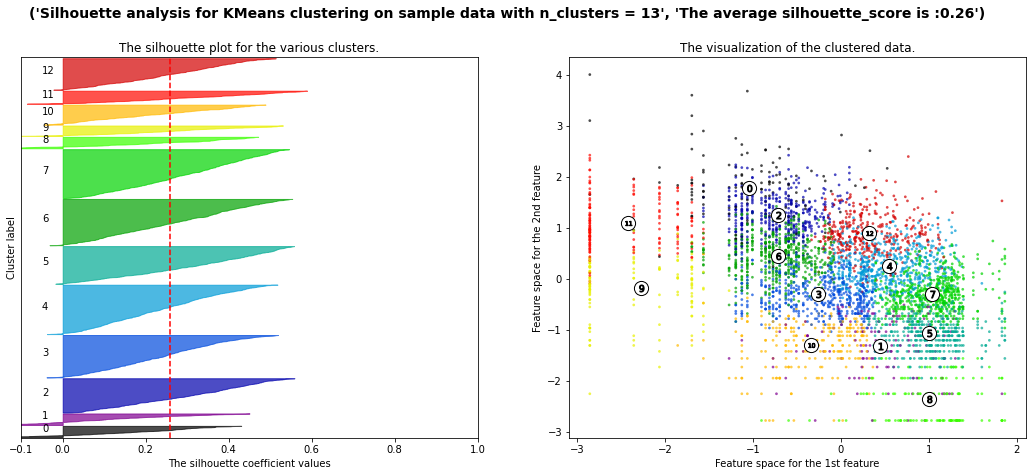

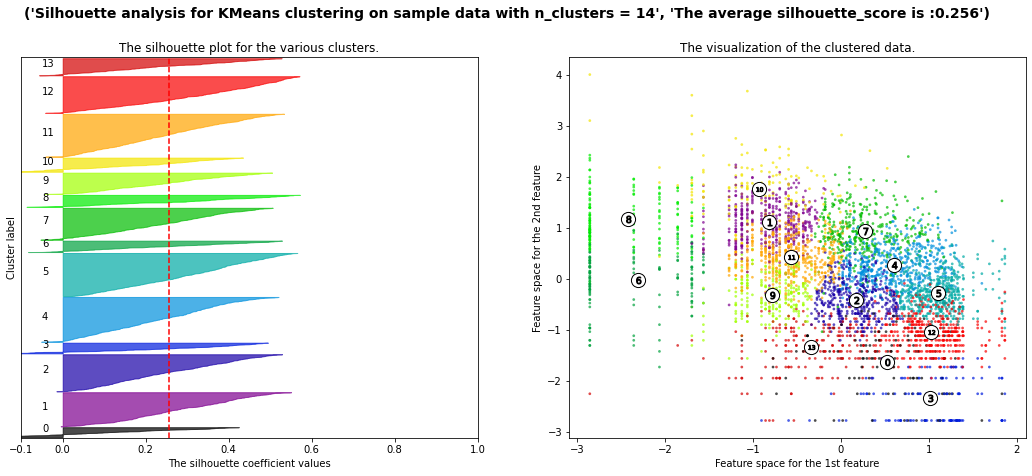

In [125]:

for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters,"The average silhouette_score is :%g"%round(silhouette_avg,3)),
                 fontsize=14, fontweight='bold')

plt.show()

In [126]:
#Fitting K-Mean model
KMean_clust_2 = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust_2.fit(X)
KMean_clust_3 = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust_3.fit(X)
#Find the clusters for the observation given in the dataset
rfm_df_1['K_mean_Cluster_2'] = KMean_clust_2.labels_
rfm_df_1['K_mean_Cluster_3'] = KMean_clust_3.labels_
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3
0,12346.0,326,1,77183.60,1,1,4,114,6,B+,5.786897,11.253942,0.000000,0,0
1,12347.0,40,182,4310.00,3,4,4,344,11,A+,3.688879,8.368693,5.204007,1,2
2,12348.0,76,31,1797.24,2,2,4,224,8,A,4.330733,7.494007,3.433987,1,0
3,12349.0,19,73,1757.55,4,3,4,434,11,A+,2.944439,7.471676,4.290459,1,2
4,12350.0,311,17,334.40,1,1,2,112,4,B,5.739793,5.812338,2.833213,0,1


In [127]:

temp_df=rfm_df_1.groupby(['K_mean_Cluster_2','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['K_mean_Cluster_2','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Customer_grade & RFM_Class in terms of number of customers')
treemap_country_wise.show()

In [128]:
temp_df=rfm_df_1.groupby(['Customer_grade','K_mean_Cluster_2'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A+'], 
          values='No. of customers',
          names='K_mean_Cluster_2',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A'], 
          values='No. of customers',
          names='K_mean_Cluster_2',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B+'], 
          values='No. of customers',
          names='K_mean_Cluster_2',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B'], 
          values='No. of customers',
          names='K_mean_Cluster_2',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

In [129]:
temp_df=rfm_df_1.groupby(['Customer_grade','K_mean_Cluster_3'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A+'], 
          values='No. of customers',
          names='K_mean_Cluster_3',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A'], 
          values='No. of customers',
          names='K_mean_Cluster_3',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B+'], 
          values='No. of customers',
          names='K_mean_Cluster_3',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B'], 
          values='No. of customers',
          names='K_mean_Cluster_3',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

# Hierarchical clustering

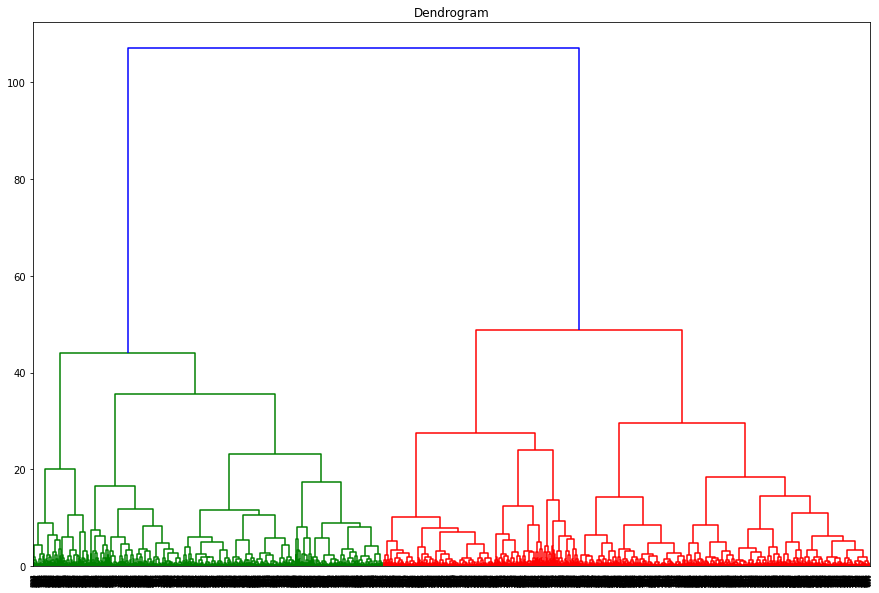

In [130]:
#plotting dendogram to determine number of clusters.
rcParams['figure.figsize'] = 15, 10
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [131]:
# Fitting hierarchical clustering to scaled dataset
ag = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = ag.fit_predict(X)

In [132]:
#creating agglomerative cluster columns
rfm_df_1['Agglomerative_Clusters'] =y_hc
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3,Agglomerative_Clusters
0,12346.0,326,1,77183.60,1,1,4,114,6,B+,5.786897,11.253942,0.000000,0,0,1
1,12347.0,40,182,4310.00,3,4,4,344,11,A+,3.688879,8.368693,5.204007,1,2,1
2,12348.0,76,31,1797.24,2,2,4,224,8,A,4.330733,7.494007,3.433987,1,0,1
3,12349.0,19,73,1757.55,4,3,4,434,11,A+,2.944439,7.471676,4.290459,1,2,1
4,12350.0,311,17,334.40,1,1,2,112,4,B,5.739793,5.812338,2.833213,0,1,0


In [133]:

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & RFM_Class in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','Customer_grade'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','Customer_grade'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & RFM_Class in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['Agglomerative_Clusters','RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['Agglomerative_Clusters','RFM_Score'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on Agglomerative_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

In [134]:
temp_df=rfm_df_1.groupby(['Customer_grade','Agglomerative_Clusters'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A+'], 
          values='No. of customers',
          names='Agglomerative_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A'], 
          values='No. of customers',
          names='Agglomerative_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B+'], 
          values='No. of customers',
          names='Agglomerative_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B'], 
          values='No. of customers',
          names='Agglomerative_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

In [135]:
rfm_df_1.groupby('Agglomerative_Clusters')['RFM_Score'].mean()

Agglomerative_Clusters
0     5.574891
1    10.164187
Name: RFM_Score, dtype: float64

# DB scan

In [149]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

Agglomerative_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=[y_pred],
                    title='Segmentation using DBscan_Clusters',
                    color = y_pred)

Agglomerative_Cluster.show()

In [137]:
#creating DBscan columns
rfm_df_1['DBscan_Clusters'] =y_pred
rfm_df_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Class,RFM_Score,Customer_grade,Recency_log,Monetary_log,Frequency_log,K_mean_Cluster_2,K_mean_Cluster_3,Agglomerative_Clusters,DBscan_Clusters
0,12346.0,326,1,77183.60,1,1,4,114,6,B+,5.786897,11.253942,0.000000,0,0,1,-1
1,12347.0,40,182,4310.00,3,4,4,344,11,A+,3.688879,8.368693,5.204007,1,2,1,0
2,12348.0,76,31,1797.24,2,2,4,224,8,A,4.330733,7.494007,3.433987,1,0,1,0
3,12349.0,19,73,1757.55,4,3,4,434,11,A+,2.944439,7.471676,4.290459,1,2,1,0
4,12350.0,311,17,334.40,1,1,2,112,4,B,5.739793,5.812338,2.833213,0,1,0,0


In [147]:
#plotting agglomerative cluster
Agglomerative_Cluster = px.scatter_3d(rfm_df_1, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_data=['Agglomerative_Clusters'],
                    title='Segmentation using DBscan_Clusters',
                    color = 'Agglomerative_Clusters')

Agglomerative_Cluster.show()

In [139]:

temp_df=rfm_df_1.groupby(['DBscan_Clusters','RFM_Class'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','RFM_Class'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & RFM_Class in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['DBscan_Clusters','Customer_grade'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','Customer_grade'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

temp_df=rfm_df_1.groupby(['DBscan_Clusters','RFM_Score'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
treemap_country_wise=px.treemap(data_frame=temp_df,
                     values='No. of customers',
                     path=['DBscan_Clusters','RFM_Score'],
                     color_discrete_sequence=px.colors.sequential.Redor_r,
                     title='Treemap based on DBscan_Clusters & Customer_grade in terms of number of customers')
treemap_country_wise.show()

In [140]:
temp_df=rfm_df_1.groupby(['Customer_grade','DBscan_Clusters'])['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'No. of customers'})
target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A+'], 
          values='No. of customers',
          names='DBscan_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='A'], 
          values='No. of customers',
          names='DBscan_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B+'], 
          values='No. of customers',
          names='DBscan_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()

target_type_piechart=px.pie(temp_df[temp_df['Customer_grade']=='B'], 
          values='No. of customers',
          names='DBscan_Clusters',
          title='Custmer grade percentage distribution')
target_type_piechart.show()